In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import os
import cv2
import tensorflow as tf
import matplotlib.image as mpimg
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from skimage.color import rgb2gray
from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras import layers, models
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential

gpus = tf.config.experimental.list_physical_devices('GPU') #with import tensorflow
tf.config.experimental.set_memory_growth(gpus[0], True) # me too



2024-03-02 11:26:15.508342: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-02 11:26:15.603764: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-02 11:26:15.603938: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [17]:
path = "../cv_data/data-ch20-master"



In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                                    horizontal_flip=True,
                                                    width_shift_range=0.1,
                                                    height_shift_range=0.1,
                                                    )

In [19]:

train_generator = train_datagen.flow_from_directory(
    path+"/train",
    target_size=(150,150),
    batch_size=5,
    class_mode="binary"
)

Found 160 images belonging to 2 classes.


In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    path+"/test",
    target_size=(150,150),
    batch_size=5,
    class_mode="binary"
)

Found 120 images belonging to 2 classes.


In [24]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150,150,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))


In [25]:
model.compile(loss="binary_crossentropy",
              optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=["accuracy"])


In [26]:
his = model.fit(
    train_generator,
    epochs=100,
    validation_data = test_generator,
    validation_steps=10
)

Epoch 1/100


2024-02-29 10:07:00.243507: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8905
2024-02-29 10:07:02.834261: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f9a3c0c6b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-29 10:07:02.834346: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-02-29 10:07:02.843040: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709168822.935963    6151 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 [==============================] - 8s 25ms/step - loss: 0.7017 - accuracy: 0.4187 - val_loss: 0.6870 - val_accuracy: 0.5800
Epoch 2/100
32/32 [==============================] - 1s 22ms/step - loss: 0.6886 - accuracy: 0.5500 - val_loss: 0.6697 - val_accuracy: 0.5400
Epoch 3/100
32/32 [==============================] - 1s 24ms/step - loss: 0.6831 - accuracy: 0.5625 - val_loss: 0.6731 - val_accuracy: 0.7600
Epoch 4/100
32/32 [==============================] - 1s 22ms/step - loss: 0.6661 - accuracy: 0.6438 - val_loss: 0.6293 - val_accuracy: 0.7800
Epoch 5/100
32/32 [==============================] - 1s 22ms/step - loss: 0.6381 - accuracy: 0.5938 - val_loss: 0.6525 - val_accuracy: 0.5200
Epoch 6/100
32/32 [==============================] - 1s 22ms/step - loss: 0.6105 - accuracy: 0.6812 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 1s 23ms/step - loss: 0.5409 - accuracy: 0.7563 - val_loss: 0.5115 - val_accuracy: 0.7200
Epoch 8/100
32/32 

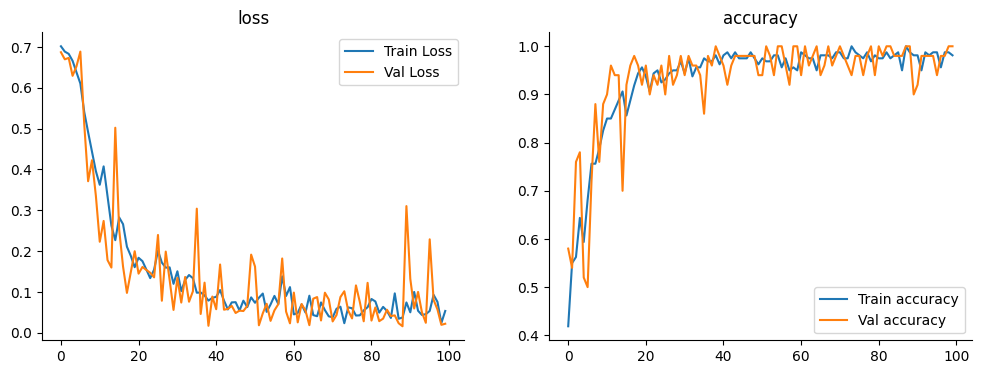

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.lineplot(x = range(len(his.history["loss"])),
             y=his.history["loss"], ax=axes[0],
             label="Train Loss")

sns.lineplot(x = range(len(his.history["loss"])),
             y=his.history["val_loss"], ax=axes[0],
             label="Val Loss")

sns.lineplot(x = range(len(his.history["accuracy"])),
             y=his.history["accuracy"], ax=axes[1],
             label="Train accuracy")

sns.lineplot(x = range(len(his.history["accuracy"])),
             y=his.history["val_accuracy"], ax=axes[1],
             label="Val accuracy")
axes[0].set_title("loss")
axes[1].set_title("accuracy")
sns.despine()
plt.show()


In [28]:
transfer_model = VGG16(weights="imagenet", include_top=False,
                       input_shape=(150,150,3))
transfer_model.trainable = False
transfer_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
finetune_model = Sequential()
finetune_model.add(Conv2D(32, (3,3), input_shape=(150,150,3)))
finetune_model.add(Activation("relu"))
finetune_model.add(MaxPooling2D(pool_size=(2,2)))

finetune_model.add(Conv2D(32, (3,3)))
finetune_model.add(Activation("relu"))
finetune_model.add(MaxPooling2D(pool_size=(2,2)))

finetune_model.add(Conv2D(64, (3,3)))
finetune_model.add(Activation("relu"))
finetune_model.add(MaxPooling2D(pool_size=(2,2)))

finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation("relu"))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation("sigmoid"))
